In [ ]:

from bs4 import BeautifulSoup
import requests

strana = 1
list_byty=[]

while True:
    mesto = 'zlin'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    byty=soup.find('div', class_='MuiStack-root css-6nlv8w').findAll('li', class_='MuiGrid-root MuiGrid-item css-l1328q')
    for li in byty:
        div = li.find('div', class_='MuiBox-root css-n6y9a7')
        if div:
            byt = div.find('p').text
            adresa =div.findAll('p')[1].text
            ulice=adresa.split(',')[0]
            kategorie=byt.split()[:2][0]+' '+byt.split()[:2][1]
            kompozice=byt.split()[2:3][0]
            velikost=byt.split()[3:][0]+' '+byt.split()[3:][1]
            velikost_int=byt.split()[3:][0]
            cena= li.find('div', class_='MuiBox-root css-n6y9a7')('p')[2].text.replace('\xa0', ' ')
            cena_int=cena.split('Kč/měsíc')[0]
            url_tagy=li.find('a')['href']
            url='https://www.sreality.cz'+url_tagy
            slovnik_byty={'Kategorie': kategorie,
                        'Kompozici': kompozice,
                        'Velikost':velikost,
                        'Velikost_int':velikost_int,
                        'Cena':cena,
                        'Cena_int':cena_int,
                        'Ulice':ulice,
                        'Adresa':adresa,
                        'URL':url}
            list_byty.append(slovnik_byty)
    # print(list_byty)

    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. 
    Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text

    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

In [302]:
list_byty
print(type(list_byty))


<class 'list'>


In [303]:
print(len(list_byty))

153


In [304]:
import pandas as pd

df=pd.DataFrame(list_byty)
df

,Kategorie,Kompozici,Velikost,Velikost_int,Cena,Cena_int,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49,14 900 Kč/měsíc,14 900,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36,11 500 Kč/měsíc,11 500,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26,8 300 Kč/měsíc,8 300,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,1+kk,31 m²,31,Cena na vyžádání,Cena na vyžádání,J. A. Bati,"J. A. Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65,18 700 Kč/měsíc,18 700,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
...,...,...,...,...,...,...,...,...,...
148,Pronájem bytu,2+kk,49 m²,49,18 000 Kč/měsíc,18 000,Tyršovo nábřeží,"Tyršovo nábřeží, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
149,Pronájem bytu,4+1,79 m²,79,19 000 Kč/měsíc,19 000,Na Honech II,"Na Honech II, Zlín",https://www.sreality.cz/detail/pronajem/byt/4+...
150,Pronájem bytu,4+kk,100 m²,100,39 900 Kč/měsíc,39 900,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/4+...
151,Pronájem bytu,2+kk,40 m²,40,9 000 Kč/měsíc,9 000,V Dolině,"V Dolině, Zlín - Jaroslavice",https://www.sreality.cz/detail/pronajem/byt/2+...


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Kategorie     153 non-null    object
 1   Kompozici     153 non-null    object
 2   Velikost      153 non-null    object
 3   Velikost_int  153 non-null    object
 4   Cena          153 non-null    object
 5   Cena_int      153 non-null    object
 6   Ulice         153 non-null    object
 7   Adresa        153 non-null    object
 8   URL           153 non-null    object
dtypes: object(9)
memory usage: 10.9+ KB


In [306]:
df.to_csv('List_bytu_Zlin.csv', index=False, sep=';')

In [307]:
import pandas as pd
df = pd.read_csv('List_bytu_Zlin.csv', sep=';') 
df.head()

,Kategorie,Kompozici,Velikost,Velikost_int,Cena,Cena_int,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49,14 900 Kč/měsíc,14 900,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36,11 500 Kč/měsíc,11 500,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26,8 300 Kč/měsíc,8 300,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,1+kk,31 m²,31,Cena na vyžádání,Cena na vyžádání,J. A. Bati,"J. A. Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65,18 700 Kč/měsíc,18 700,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [308]:
df['Velikost_int'] = pd.to_numeric(df['Velikost_int'], errors='coerce')

df.head()

,Kategorie,Kompozici,Velikost,Velikost_int,Cena,Cena_int,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14 900,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11 500,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8 300,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,1+kk,31 m²,31.0,Cena na vyžádání,Cena na vyžádání,J. A. Bati,"J. A. Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18 700,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [309]:
def convert_to_float(x):
    # Zkontroluje, jestli se jedná o číslo
    if x.replace(' ', '').isdigit():  # Pokud je po odstranění mezer číslo
        return float(x.replace(' ', ''))  # Odstraní mezery a převádí na float
    return None  # Pokud to není číslo, vrátí None

# Použití funkce na sloupec 'Cena_int'
df['Cena_int'] = df['Cena_int'].apply(convert_to_float)
df.head()

,Kategorie,Kompozici,Velikost,Velikost_int,Cena,Cena_int,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14900.0,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11500.0,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8300.0,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,1+kk,31 m²,31.0,Cena na vyžádání,NaN,J. A. Bati,"J. A. Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18700.0,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [310]:
df.head()

,Kategorie,Kompozici,Velikost,Velikost_int,Cena,Cena_int,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14900.0,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11500.0,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8300.0,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,1+kk,31 m²,31.0,Cena na vyžádání,NaN,J. A. Bati,"J. A. Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18700.0,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [311]:
(df['Cena'] == 'Cena na vyžádání').sum()

np.int64(4)

In [312]:
df['Kompozici'].value_counts()

Kompozici
2+kk        42
2+1         29
1+kk        27
3+1         18
1+1         14
pokoje       9
3+kk         8
4+1          2
atypický     2
bytu         1
4+kk         1
Name: count, dtype: int64

In [313]:
radeknull=df.loc[df['Kompozici']=='bytu'].index
df.drop(index=radeknull, inplace=True)

In [314]:
df['Kompozici'].value_counts()

Kompozici
2+kk        42
2+1         29
1+kk        27
3+1         18
1+1         14
pokoje       9
3+kk         8
atypický     2
4+1          2
4+kk         1
Name: count, dtype: int64

In [315]:
radeknull_1= df.loc[df['Cena']=='Cena na vyžádání'].index
df.drop(index=radeknull_1, inplace=True)

In [317]:
(df['Cena'] == 'Cena na vyžádání').sum()

np.int64(0)

In [319]:
df.rename(columns={'Velikost_int': 'Velikost_m2', 'Cena_int': 'Cena_Kč/měsíc'}, inplace=True)
df.head()

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14900.0,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11500.0,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8300.0,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
4,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18700.0,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
5,Pronájem bytu,2+1,56 m²,56.0,12 000 Kč/měsíc,12000.0,Dlouhá,"Dlouhá, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [320]:
df.to_csv('List_bytu_Zlin_upravene.csv', index=False, sep=';')

In [5]:
import pandas as pd
df = pd.read_csv('List_bytu_Zlin_upravene.csv', sep=';') 
df.head()

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14900.0,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11500.0,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8300.0,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18700.0,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
4,Pronájem bytu,2+1,56 m²,56.0,12 000 Kč/měsíc,12000.0,Dlouhá,"Dlouhá, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


### Analýza dat

In [6]:
seskukpena_kompozice=df['Kompozici'].value_counts().reset_index(name='Pocet bytu')
seskukpena_kompozice

,Kompozici,Pocet bytu
0,2+kk,41
1,2+1,29
2,1+kk,24
3,3+1,18
4,1+1,14
5,pokoje,9
6,3+kk,8
7,atypický,2
8,4+1,2
9,4+kk,1


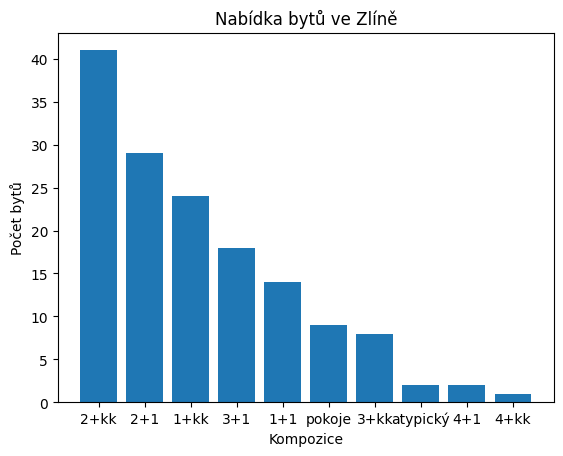

In [7]:
from matplotlib import pyplot as plt

plt.bar(seskukpena_kompozice['Kompozici'], seskukpena_kompozice['Pocet bytu'])
plt.title('Nabídka bytů ve Zlíně')
plt.xlabel('Kompozice')
plt.ylabel('Počet bytů')
plt.show()

In [8]:
prumer=df['Cena_Kč/měsíc'].mean()
print(f'Průměrná cena bytů je: {prumer:.0f} Kč za měsíc ')

Průměrná cena bytů je: 14130 Kč za měsíc 


In [9]:
sorted_kompozice=df.groupby('Kompozici')['Cena_Kč/měsíc'].mean().reset_index(name='Prumer')
sorted_kompozice_1=sorted_kompozice.sort_values(by='Prumer', ascending=False)

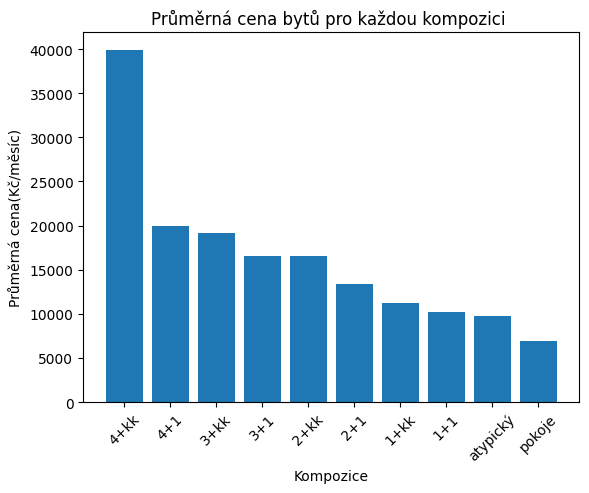

In [10]:
from matplotlib import pyplot as plt

plt.bar(sorted_kompozice_1['Kompozici'], sorted_kompozice_1['Prumer'])
plt.title('Průměrná cena bytů pro každou kompozici ')
plt.xlabel('Kompozice')
plt.ylabel('Průměrná cena(Kč/měsíc)')
plt.xticks(rotation = 45)
plt.show()

In [11]:
sorted_kompozice_vel=df.groupby('Kompozici')['Velikost_m2'].mean().reset_index(name='Velikost')
sorted_kompozice_2=sorted_kompozice_vel.sort_values(by='Velikost', ascending=False)
sorted_kompozice_2

,Kompozici,Velikost
7,4+kk,100.000000
5,3+kk,82.875000
6,4+1,81.000000
4,3+1,78.277778
3,2+kk,59.170732
2,2+1,56.551724
9,pokoje,37.666667
0,1+1,35.071429
1,1+kk,29.125000
8,atypický,27.000000


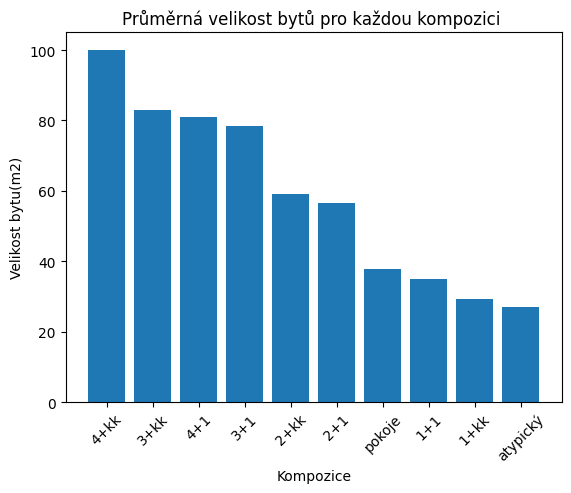

In [12]:
plt.bar(sorted_kompozice_2['Kompozici'], sorted_kompozice_2['Velikost'])
plt.title('Průměrná velikost bytů pro každou kompozici ')
plt.xlabel('Kompozice')
plt.ylabel('Velikost bytu(m2)')
plt.xticks(rotation = 45)
plt.show()

In [13]:
df.head()

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
0,Pronájem bytu,2+kk,49 m²,49.0,14 900 Kč/měsíc,14900.0,Zelinova,"Zelinova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
1,Pronájem bytu,1+1,36 m²,36.0,11 500 Kč/měsíc,11500.0,Podlesí V,"Podlesí V, Zlín",https://www.sreality.cz/detail/pronajem/byt/1+...
2,Pronájem bytu,1+kk,26 m²,26.0,8 300 Kč/měsíc,8300.0,Tečovská,"Tečovská, Zlín - Malenovice",https://www.sreality.cz/detail/pronajem/byt/1+...
3,Pronájem bytu,2+kk,65 m²,65.0,18 700 Kč/měsíc,18700.0,Lorencova,"Lorencova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
4,Pronájem bytu,2+1,56 m²,56.0,12 000 Kč/měsíc,12000.0,Dlouhá,"Dlouhá, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...


In [126]:
df['Ulice'].unique()

array(['Zelinova', 'Podlesí V', 'Tečovská', 'Lorencova', 'Dlouhá',
       'Vysoká', 'Zahradní', 'Tyršova', 'Lešetín I', 'Beckovská',
       'Větrná', 'Dukelská', 'Václavská', 'Budovatelská', 'Chelčického',
       'Zlín', 'Pod Veselou', 'Komenského', 'třída Svobody',
       'Nad Vývozem', 'Zarámí', 'Na Honech II', 'Havlíčkova', 'Česká',
       'Družstevní', 'tř. Spojenců', 'Sadová', 'Cihlářská', 'Podlesí II',
       'L. Váchy', 'Pasecká', 'Kúty', 'nám. 3. května',
       'Otrokovice - Kvítkovice', 'Masarykovo náměstí', 'Potoky',
       'Nádražní', 'Zadní luhy', 'Pančava', 'Vejvanovská', 'Štefánikova',
       'třída Tomáše Bati', 'Slunečná', 'Zabrání', 'Zálešná II',
       'Havlíčkovo nábřeží', 'Javorová', 'Žlutava', 'Luhačovice',
       'Jílová', 'Podlesí I', 'Přístav', 'Sokolská', 'Zlín - Prštné',
       'Bezručova', 'Slezská', 'Podlesí III', 'Hlavní', 'Nábřeží',
       'Hrnčířská', 'Okružní', 'Smetanova', 'Napajedla', 'Lidická',
       'Zábrančí I', 'Díly II', 'Nivy II', 'Leoše Janáčk

In [129]:
seskupena_ulice_cena=df.groupby('Ulice')['Cena_Kč/měsíc'].mean().reset_index(name='Prumer')
sorted_2=seskupena_ulice_cena.sort_values(by='Prumer', ascending=False)
sorted_2.head()


,Ulice,Prumer
30,Na Honech I,25000.000000
23,Lešetín I,20500.000000
26,Luhačovice,20316.666667
48,Přístav,20000.000000
0,Bartošova,20000.000000


In [140]:
df.loc[df['Ulice']=='Na Honech I']

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
114,Pronájem bytu,3+kk,75 m²,75.0,25 000 Kč/měsíc,25000.0,Na Honech I,"Na Honech I, Zlín",https://www.sreality.cz/detail/pronajem/byt/3+...


In [135]:
sorted_3=df.loc[df['Cena_Kč/měsíc']>=20000]
sorted_3['Kompozici'].value_counts().reset_index(name='Pocet')

,Kompozici,Pocet
0,2+kk,9
1,3+kk,3
2,4+1,1
3,4+kk,1


In [136]:
sorted_4=df.groupby('Kompozici')['Cena_Kč/měsíc'].agg(['mean', 'sum', 'max', 'min']).reset_index()
sorted_4

,Kompozici,mean,sum,max,min
0,1+1,10228.571429,143200.0,13500.0,4200.0
1,1+kk,11200.000000,268800.0,14900.0,6500.0
2,2+1,13346.551724,387050.0,16500.0,9000.0
3,2+kk,16562.926829,679080.0,25000.0,9000.0
4,3+1,16591.666667,298650.0,19000.0,11900.0
5,3+kk,19125.000000,153000.0,29000.0,13000.0
6,4+1,20000.000000,40000.0,21000.0,19000.0
7,4+kk,39900.000000,39900.0,39900.0,39900.0
8,atypický,9750.000000,19500.0,12000.0,7500.0
9,pokoje,6889.777778,62008.0,10500.0,3708.0


In [142]:
kompozice_values = sorted_5['Kompozici'].tolist()
         
for index, byt in enumerate(kompozice_values):
    value_1=sorted_5.loc[index, 'max']
    # print(value_1)
    value_2=sorted_5.loc[index, 'min']
    # print(value_2)
    rozdil=value_1-value_2
    print (f'Rozdil pro {byt} je: {rozdil:.0f} Kč/měsíc')

    sorted_4.loc[index, 'Rozdil mezi max a min'] = rozdil

        

Rozdil pro 1+1 je: 9300 Kč/měsíc
Rozdil pro 1+kk je: 8400 Kč/měsíc
Rozdil pro 2+1 je: 7500 Kč/měsíc
Rozdil pro 2+kk je: 16000 Kč/měsíc
Rozdil pro 3+1 je: 7100 Kč/měsíc
Rozdil pro 3+kk je: 16000 Kč/měsíc
Rozdil pro 4+1 je: 2000 Kč/měsíc
Rozdil pro 4+kk je: 0 Kč/měsíc
Rozdil pro atypický je: 4500 Kč/měsíc
Rozdil pro pokoje je: 6792 Kč/měsíc


In [143]:
sorted_4

,Kompozici,mean,sum,max,min,Rozdil mezi max a min
0,1+1,10228.571429,143200.0,13500.0,4200.0,9300.0
1,1+kk,11200.000000,268800.0,14900.0,6500.0,8400.0
2,2+1,13346.551724,387050.0,16500.0,9000.0,7500.0
3,2+kk,16562.926829,679080.0,25000.0,9000.0,16000.0
4,3+1,16591.666667,298650.0,19000.0,11900.0,7100.0
5,3+kk,19125.000000,153000.0,29000.0,13000.0,16000.0
6,4+1,20000.000000,40000.0,21000.0,19000.0,2000.0
7,4+kk,39900.000000,39900.0,39900.0,39900.0,0.0
8,atypický,9750.000000,19500.0,12000.0,7500.0,4500.0
9,pokoje,6889.777778,62008.0,10500.0,3708.0,6792.0


In [144]:
df.loc[df['Ulice']=='Luhačovice']

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
71,Pronájem bytu,3+kk,62 m²,62.0,15 000 Kč/měsíc,15000.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/3+...
109,Pronájem bytu,atypický,35 m²,35.0,12 000 Kč/měsíc,12000.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/at...
130,Pronájem bytu,2+kk,85 m²,85.0,22 000 Kč/měsíc,22000.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/2+...
135,Pronájem bytu,1+kk,33 m²,33.0,11 000 Kč/měsíc,11000.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/1+...
142,Pronájem bytu,2+kk,85 m²,85.0,22 000 Kč/měsíc,22000.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/2+...
145,Pronájem bytu,4+kk,100 m²,100.0,39 900 Kč/měsíc,39900.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/4+...


In [374]:
df.loc[df['Cena_Kč/měsíc']>=25000]

,Kategorie,Kompozici,Velikost,Velikost_m2,Cena,Cena_Kč/měsíc,Ulice,Adresa,URL
8,Pronájem bytu,2+kk,96 m²,96.0,25 000 Kč/měsíc,25000.0,Lešetín I,"Lešetín I, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
58,Pronájem bytu,3+kk,95 m²,95.0,29 000 Kč/měsíc,29000.0,třída Tomáše Bati,"třída Tomáše Bati, Zlín",https://www.sreality.cz/detail/pronajem/byt/3+...
114,Pronájem bytu,3+kk,75 m²,75.0,25 000 Kč/měsíc,25000.0,Na Honech I,"Na Honech I, Zlín",https://www.sreality.cz/detail/pronajem/byt/3+...
115,Pronájem bytu,2+kk,111 m²,111.0,25 000 Kč/měsíc,25000.0,Smetanova,"Smetanova, Zlín",https://www.sreality.cz/detail/pronajem/byt/2+...
145,Pronájem bytu,4+kk,100 m²,100.0,39 900 Kč/měsíc,39900.0,Luhačovice,Luhačovice,https://www.sreality.cz/detail/pronajem/byt/4+...


In [ ]:
# TEST for 1st page 
# from bs4 import BeautifulSoup
# import requests
# strana = 1
# mesto = 'zlin'
# data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
# soup = BeautifulSoup(data, 'html.parser')
# byty=soup.find('div', class_='MuiStack-root css-6nlv8w').findAll('li', class_='MuiGrid-root MuiGrid-item css-l1328q')
# list_byty=[]
# for li in byty:
#     div = li.find('div', class_='MuiBox-root css-n6y9a7')
#     if div:
#         byt = div.find('p').text
#         adresa =div.findAll('p')[1].text
#         ulice=adresa.split(',')[0]
#         kategorie=byt.split()[:2][0]+' '+byt.split()[:2][1]
#         kompozice=byt.split()[2:3][0]
#         velikost=byt.split()[3:][0]+' '+byt.split()[3:][1]
#         velikost_int=byt.split()[3:][0]
#         cena= li.find('div', class_='MuiBox-root css-n6y9a7')('p')[2].text.replace('\xa0', ' ')
#         cena_int=cena.split('Kč/měsíc')[0]
#         url_tagy=li.find('a')['href']
#         url='https://www.sreality.cz'+url_tagy
#         print(byt)
#         print(kompozice)
#         print(velikost)
#         print(velikost_int)
#         print(cena)
#         print(cena_int)
#         # print(kategorie)
#         print(ulice)
#         print(adresa)
#         print(url_tagy)
#         print(url)
    
#         slovnik_byty={'Kategorie': kategorie,
#                       'Kompozici': kompozice,
#                       'Velikost':velikost,
#                       'Cena':cena,
#                       'Ulice':ulice,
#                       'Mesto':mesto,
#                       'URL':url}
#         list_byty.append(slovnik_byty)
# # print(list_byty)